# Setup

In [45]:
%matplotlib inline
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A

(-0.5, 1289.5, 814.5, -0.5)

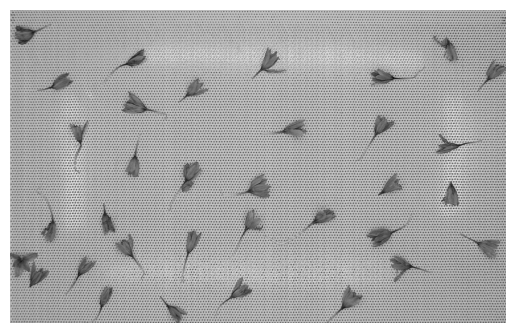

In [46]:
im = cv2.imread('images/img_01.jpg',0)
plt.imshow(im, cmap='gray')
plt.axis('off')

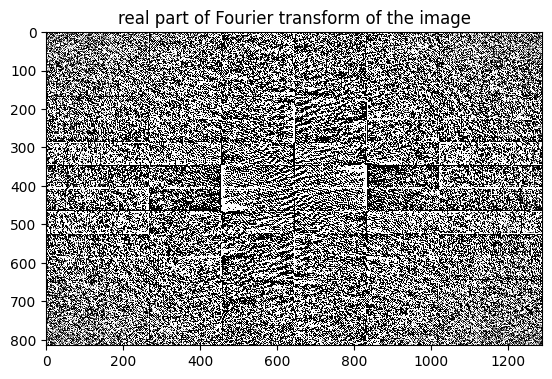

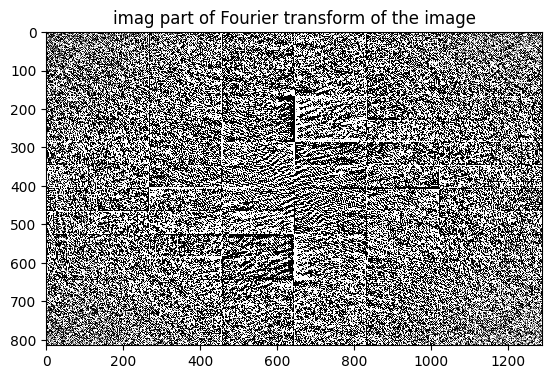

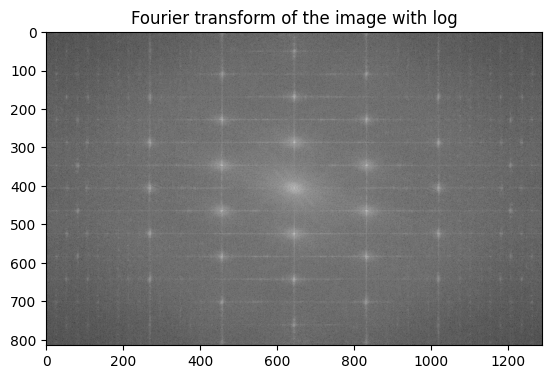

In [72]:
denoised = im.copy()

denoisedfft = np.fft.fft2(denoised)
denoisedshift = np.fft.fftshift(denoisedfft)
denoisedabs = np.abs(denoisedshift)
plt.imshow(np.real(denoisedshift), cmap = 'gray', vmin=-255, vmax=255)
plt.title('real part of Fourier transform of the image')
plt.show()

plt.imshow(np.imag(denoisedshift), cmap = 'gray', vmin=-255, vmax=255)
plt.title('imag part of Fourier transform of the image')
plt.show()

denoisedlog = np.log(denoisedabs)
denoisedshow = 15 * denoisedlog
plt.imshow(denoisedshow, cmap = 'gray')
plt.title('Fourier transform of the image with log')
plt.show()

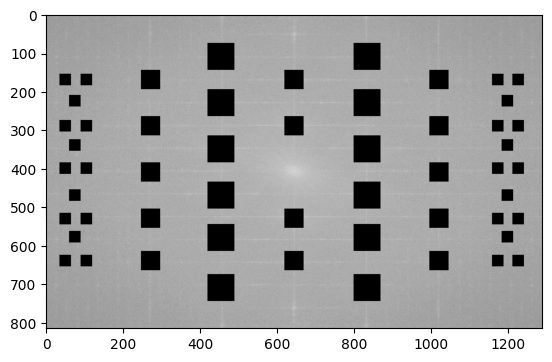

In [79]:
#for smallest points:
r1 = 15

x1 = [50 , 105, 1175, 1228]
y1 = [640, 531, 400, 290, 170]

x2 = [75, 1200]
y2 = [225, 340, 470, 578]

for i in x1: 
    for j in y1:
        denoisedshift[j - r1 : j + r1, i - r1 : i + r1] = 0.00001

for i in x2: 
    for j in y2:
        denoisedshift[j - r1 : j + r1, i - r1 : i + r1] = 0.00001
        
#for smaller points:
r2 = 25

x3 = [272, 645, 1022]
y3 = [640, 530, 290, 170]

x4 = [272, 1022]
y4 = [410]

r3 = 35

x5 = [455, 835]
y5 = [710, 580, 470, 350, 230, 110]

for i in x3: 
    for j in y3:
        denoisedshift[j - r2 : j + r2, i - r2 : i + r2] = 0.00001

for i in x4: 
    for j in y4:
        denoisedshift[j - r2 : j + r2, i - r2 : i + r2] = 0.00001

for i in x5: 
    for j in y5:
        denoisedshift[j - r3 : j + r3, i - r3 : i + r3] = 0.00001

denoisedshow2 = 20 * np.log(np.abs(denoisedshift))
plt.imshow(denoisedshow2, cmap = 'gray')
plt.show()

denoisedimage = np.fft.ifftshift(denoisedshift)
denoisedimage = np.real(np.fft.ifft2(denoisedimage))

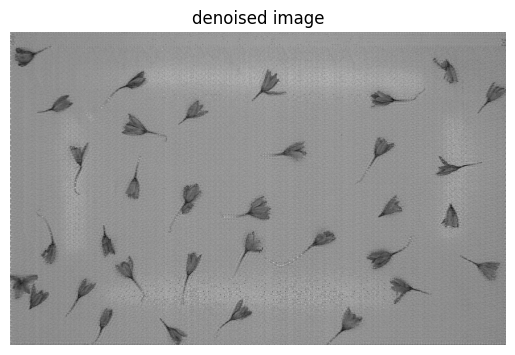

In [80]:
plt.imshow(denoisedimage, cmap='gray')
plt.title("denoised image")
plt.axis('off')
plt.show()

## Part B

Canny

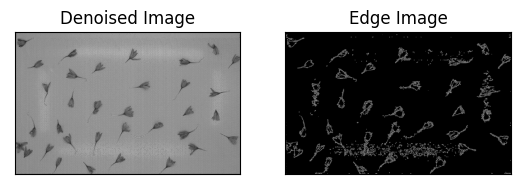

In [103]:
edges = cv2.Canny(np.uint8(denoisedimage),80,300)
plt.subplot(121),plt.imshow(denoisedimage,cmap = 'gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Part C


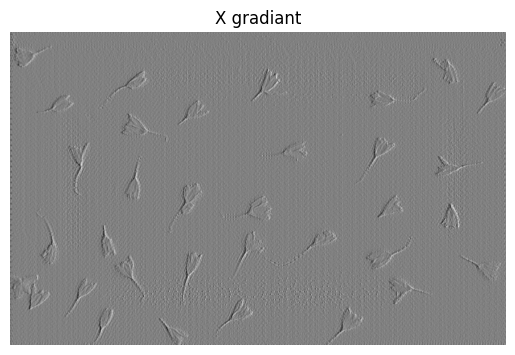

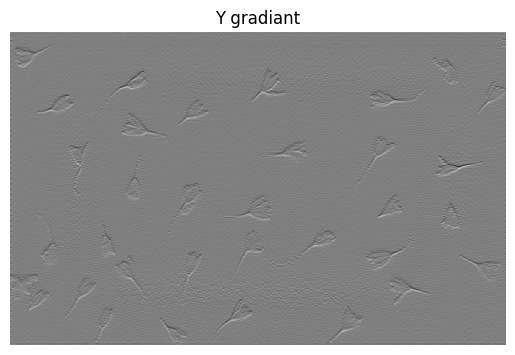

In [106]:
sobelx = cv2.Sobel(denoisedimage,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(denoisedimage,cv2.CV_64F,0,1,ksize=5)

plt.imshow(sobelx, cmap='gray')
plt.title('X gradiant')
plt.axis('off')
plt.show()

plt.imshow(sobely, cmap='gray')
plt.title('Y gradiant')
plt.axis('off')
plt.show()

(-0.5, 1289.5, 814.5, -0.5)

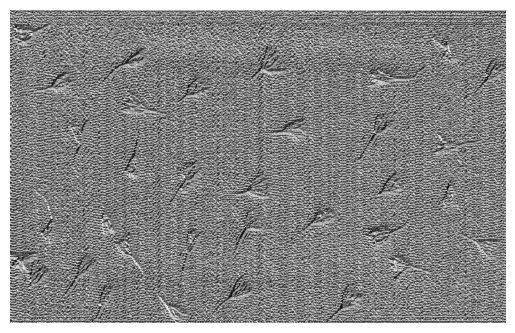

In [111]:
gradient_oreintation = np.arctan2(sobely , sobelx)
gradient_oreintation = gradient_oreintation * 180 / np.pi

plt.imshow(gradient_oreintation, cmap='gray')
plt.axis('off')